## Exercise 10.1 (search)

We want to find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function. To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

### Solution

We first create the list of random numbers

In [48]:
import numpy as np
x = np.random.rand(1000)

#### Approach 1

In [49]:
def min_max1(x):
    # YOUR CODE HERE
    x_max=0
    x_min=2**30
    for u in x:
      if u > x_max:
        x_max = u
      if u < x_min:
        x_min = u

    return  x_min, x_max
    
print(min_max1(x))

(0.0017261219356170532, 0.9994139044945731)


#### Approach 2

In [50]:
def min_max2(x):
    x = np.sort(x)
    return x[0],x[-1]

print(min_max2(x))

(0.0017261219356170532, 0.9994139044945731)


In [51]:
assert min_max1(x) == min_max2(x)

In practice, we would use the the NumPy function:

In [52]:
print(np.min(x), np.max(x))

0.0017261219356170532 0.9994139044945731


## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

### Task

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here
    
    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:
$$
f(x) = \tan(x) - 2x
$$
between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ on the same graph, 
and show the roots computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

### Solution

We first implement a Newton solver function:

In [68]:
import numpy as np

class Max_Iterations_Reached(Exception):
  def __init__(self, *args):
    super().__init__(args)

class UndefinedError(Exception):
  def __init__(self, *args):
    super().__init__(args)

def newton(f, df, x, tol=1e-8, max_it=100):
    """Find root of equation defined by function f(x) where df(x) is
    first derivative and x is the initial guess.Optional arguments tol 
    (tolerance) and max_it (maximum number of iterations)"""
    

    if not ( isinstance(x, float) or isinstance(x, int) ):
      raise TypeError("Input x must be an int or float")

    if not ( isinstance(tol, float) ):
      raise TypeError("Input tolerance must be a float")

    if not isinstance(max_it, int):
      raise TypeError("max_it must be an int")

    # YOUR CODE HERE
    error = tol+1
    iter = 0
    while error > tol:

      if iter > max_it:
        raise Max_Iterations_Reached("Max iteration of {} reached. Input value of x may diverge".format(max_it))

      
      try: fx = f(x)
      except:
        raise UndefinedError("Function f(x) not defined at x = {}".format(x))
      
      try: dfx = df(x)
      except:
        raise  UndefinedError("Function df(x) not defined at x = {}".format(x))
      
      x -= fx/dfx
      error = abs(fx)
      iter+=1

    return x



We now provide implementations of `f` and `df`, and find the roots:

In [74]:

def f(x):
    # YOUR CODE HERE
    return np.tan(x) - 2.0*x

def df(x):
    # YOUR CODE HERE
    return 1.0/np.cos(x)**2 - 2.0

In [72]:
# YOUR CODE HERE
print(f(0.93))
r1 = newton(f,df, 1.5)
r2 = newton(f,df, 0.2)
r3 = newton(f,df, -1.5)

-0.5191261710871657


We can visualise the result:

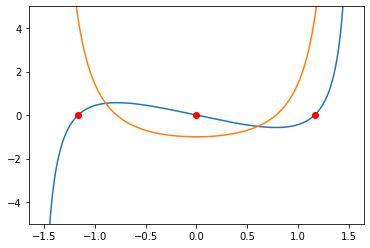

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot f and df/dx
x = np.linspace(-1.5, 1.5, 1000)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")

# Add location of roots to plot
# YOUR CODE HERE
plt.plot(r1,0,'ro') 
plt.plot(r2,0,'ro') 
plt.plot(r3,0,'ro')

plt.ylim((-5,5))

plt.show()

For the extension, we can replace the function `df(x)` with a new version

In [57]:
def df(x):
    # Try changing dx to 1e-15 or smaller
    dx = 1e-9
    # YOUR CODE HERE
    return (f(x + dx) - f(x - dx)) / (2*dx)

In [58]:
# Find roots near -1.2, 0.1, and 1.2
xroots = np.array((newton(f, df, -1.2),
                   newton(f, df, 0.1),
                   newton(f, df, 1.2)))
assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

(-5.0, 5.0)

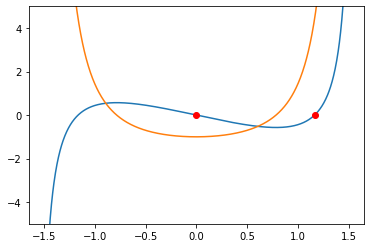

In [59]:
# Plot f, f' and roots

# YOUR CODE HERE
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")
plt.plot(r1,0,'ro') 
plt.plot(r2,0,'ro')

plt.ylim((-5,5))

In practice, we could use the Newton function `scipy.optimize.newton` from SciPy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) rather than implementing our own function.

## Exercise 10.3 (optional, low pass image filter)

Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity. See https://matplotlib.org/users/image_tutorial.html for more background.

Below we fetch an image and display it:

<class 'numpy.ndarray'>
Image array shape: (430, 820, 3)


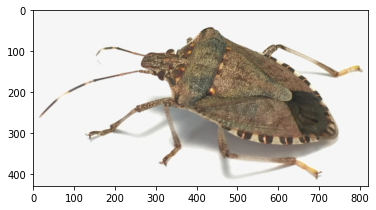

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




# Import image

import PIL
import urllib.request as request

url = "https://www.seekpng.com/png/detail/332-3324331_stink-bug-png-image-background-brown-marmorated-stink.png" # different stinkbug image

img = PIL.Image.open(request.urlopen(url))

img = np.array(img)

# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# Display image
plt.imshow(img);

The task is to write a *function* that applies a particular low-pass filter algorithm to an image array 
and  returns the  filtered image. With this particular filter, the value of a pixel in the filtered image 
is equal to the average value of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, 
the neighbours are  `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```

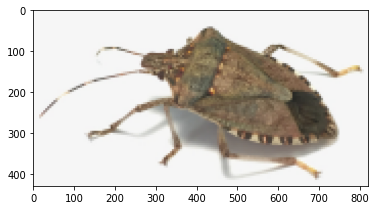

In [61]:
# YOUR CODE HERE

# 2D average pooling

pooled_image = np.zeros_like(img)

w,h,_ = img.shape

f=5  ## cell size

i = 0
while i < w:
    j = 0
    while j < h:
        pooled_image[i:i+f,j:j+f,:] = img[i:i+f,j:j+f,:].sum(axis=(0,1))/(f**2)
        j+=f
    i+=f

plt.imshow(pooled_image);
